<a href="https://www.kaggle.com/code/rrbuddy/ted-talks-basics?scriptVersionId=96077757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ted-talks/data.csv


In [2]:
df=pd.read_csv('../input/ted-talks/data.csv')
df.head(5)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [3]:
df.shape


(5440, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [5]:
df.isnull().sum()
# There is only one null value. So we can go stright into analysis

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

**2.Finding the most popular TED talk Speaker (in terms of number of talks)**

In [6]:
pop_speaker=df['author'].value_counts().reset_index().head(10)
pop_speaker.columns=['Speaker','no of talks']
pop_speaker

,Speaker,no of talks
0,Alex Gendler,45
1,Iseult Gillespie,33
2,Matt Walker,18
3,Alex Rosenthal,15
4,Elizabeth Cox,13
5,Emma Bryce,12
6,Juan Enriquez,11
7,Daniel Finkel,11
8,Jen Gunter,9
9,Greg Gage,9


<AxesSubplot:xlabel='Speaker'>

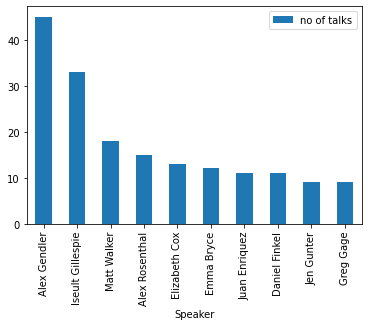

In [7]:
'''Bar Gragh Most popular speaker vs frequency'''
pop_speaker.plot(kind='bar',x='Speaker',y='no of talks')

**1.Finding the most popular TED talks**

In [8]:
df.loc[df['views'].idxmax()]['title'] # the topmost TED talk -->'Do schools kill creativity?'

pop_talks=df.sort_values('views',ascending=False)[['title','views']].reset_index().head(10)
pop_talks

,index,title,views
0,5436,Do schools kill creativity?,72000000
1,4084,Your body language may shape who you are,64000000
2,2958,Inside the mind of a master procrastinator,60000000
3,4765,How great leaders inspire action,57000000
4,4605,The power of vulnerability,56000000
5,3504,How to speak so that people want to listen,49000000
6,2168,My philosophy for a happy life,43000000
7,3251,The next outbreak? We're not ready,43000000
8,3017,What makes a good life? Lessons from the longe...,41000000
9,3994,"Looks aren't everything. Believe me, I'm a model.",38000000


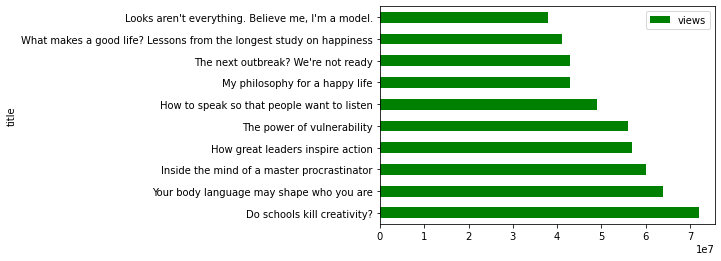

In [9]:
pop_talks.plot(kind='barh',x='title',y='views',color='green')
plt.show()

**3. Month-wise Analysis of TED talk frequency   
4.Year-wise Analysis of TED talk frequency**

In [10]:
#len(df['title'].unique())   ## Was just checking the unique values in TED talks
'''Spliting the 'date' into month and year '''
df['date']=df['date'].astype('string')   
#df['date'].dtype
#split_date=df['date'].str.split(' ')
#len(split_date[0])
#df.columns=['month','year']
df['month']=df['date'].str.split(' ').str[0]
df['year']=df['date'].str.split(' ').str[1]
df['year']
df.head(10)

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,October 2021,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...,October,2021
6,The myth of Narcissus and Echo,Iseult Gillespie,February 2022,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...,February,2022
7,You deserve the right to repair your stuff,Gay Gordon-Byrne,August 2021,455000,13000,https://ted.com/talks/gay_gordon_byrne_you_des...,August,2021
8,What nature can teach us about sustainable bus...,Erin Meezan,February 2022,66000,1900,https://ted.com/talks/erin_meezan_what_nature_...,February,2022
9,The origins of blackface and Black stereotypes,Dwan Reece,March 2019,584000,17000,https://ted.com/talks/dwan_reece_the_origins_o...,March,2019


In [11]:
'''Grouping title (TED talks) according to the years and plotting gragh'''

# month_vise_title=df.groupby('year')['title'].count()
year_vise_title=df.groupby('year').size()
year_vise_title



year
1970      2
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     26
2003     34
2004     33
2005     65
2006     49
2007    113
2008     84
2009    233
2010    267
2011    271
2012    302
2013    388
2014    357
2015    377
2016    399
2017    495
2018    473
2019    544
2020    501
2021    390
2022     20
dtype: int64

<AxesSubplot:title={'center':'No of TED talks vs Year'}, xlabel='Year', ylabel='Freq of TED talks'>

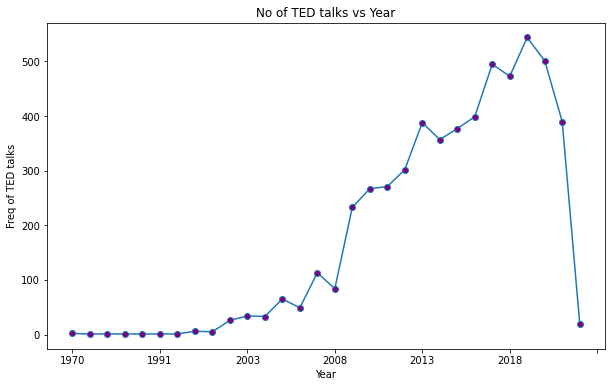

In [12]:
year_vise_title.plot(kind='line',figsize=(10,6),ylabel='Freq of TED talks',xlabel='Year',title='No of TED talks vs Year',marker='o',markerfacecolor='purple')

In [13]:
'''Grouping title (TED talks) according to the months for last 5 years and plotting gragh'''

h=df.groupby(['year','month'],as_index=False).size()  #as_insex was included to convert the result which is 'series' to 'dataframe'
# h=df.groupby(['year','month'].to_frame('size').rest_index()
#h.columns
#h.tail(10)

cats = ['January','February','March','April','May','June','July','August','September','October','November','December']
h['month']=pd.Categorical(h['month'],categories=cats,ordered=True) # pd.Categorical & sot_values is to categorize the months in calendar order
h=h.sort_values(['year','month'])
h.tail(20)

,year,month,size
179,2020,July,33
175,2020,August,24
185,2020,September,27
184,2020,October,97
183,2020,November,48
176,2020,December,19
190,2021,January,15
189,2021,February,23
193,2021,March,30
186,2021,April,29


<AxesSubplot:title={'center':'TED Talks in 2021'}, xlabel=' ', ylabel='No of talks'>

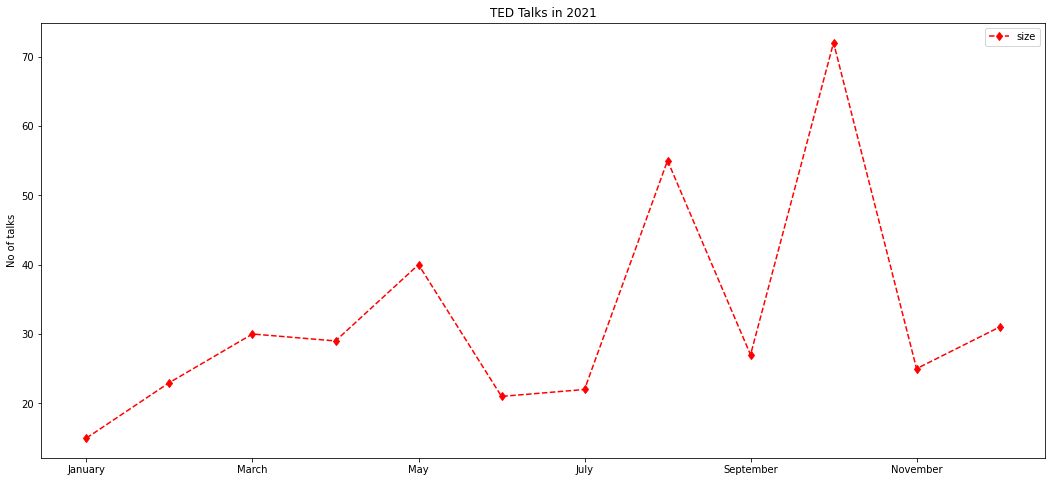

In [14]:
year_2021=h[['month','size']][h['year']=='2021']
year_2021.head(20)

year_2021.plot(kind='line',figsize=(18,8),x='month',y='size',xlabel=' ',ylabel='No of talks',title='TED Talks in 2021',linestyle='dashed',marker='d',color='red')

#plt.plot(cats,year_2022['size']) #trying to plot for each year in the same 
#gragh but looks complicated because some years like 2022 have only data for few months.

**5.Finding TED talks of your favorite Author**

In [15]:
'''Favourite author is one with most no of views and likes'''
# df['author'].unique() #----> Not giving correct answer
#df.groupby(['author']).size().sort_values()

fav_auth=df.loc[df['views'].idxmax() & df['likes'].idxmax()]
#fav_auth  # According to this the favourite author is Sir Ken Robinson

df.loc[df['author']==fav_auth['author']]['title']  #Finding Sir Ken Robinson's talks



#df['views'].idxmax()
#df.loc[df['likes'].idxmax(),['author']]
#df.loc[df['views'].idxmax(),['author']]

#df.groupby(['author'])['likes'].sum().sort_values(ascending=False).head(10)

422     How would you finish the sentence, "Imagine if...
3872               How to escape education's death valley
4609                         Changing education paradigms
4750                    Bring on the learning revolution!
5436                          Do schools kill creativity?
Name: title, dtype: object

**6.Finding TED talks with the best view to like ration**

In [16]:
df['view_to_like_ratio']=(df['views']/df['likes'])*0.1
df.head(10)

#df['view_to_like_ratio'].sort_values().tail(10)
talks_ratio=df[['title','view_to_like_ratio']].sort_values(by='view_to_like_ratio',ascending=False)
talks_ratio.head(10)

,title,view_to_like_ratio
905,What's the point(e) of ballet?,3.640000
955,A camera that can see around corners,3.640000
837,How to see more and care less: The art of Geor...,3.640000
26,Can you outsmart the fallacy that divided a na...,3.630000
1016,The function and fashion of eyeglasses,3.630000
3089,How computers translate human language,3.618182
4389,The right to understand,3.610000
4362,How to topple a dictator,3.609091
5129,On glamour,3.608333
1125,Hacking bacteria to fight cancer,3.600000


**7.Finding TED talks based on tags(like climate)**

In [17]:
'''There are 92 TED talk title which contains the word climate'''
df[df['title'].str.contains('climate',case=False)]['title'].reset_index()

,index,title
0,0,Climate action needs new frontline leadership
1,3,Why is China appointing judges to combat clima...
2,17,The ocean's ingenious climate solutions
3,18,How we're reducing the climate impact of elect...
4,34,How to boost nature-based solutions to climate...
...,...,...
87,4892,The science behind a climate headline
88,5226,New thinking on the climate crisis
89,5280,A critical look at geoengineering against clim...
90,5389,Global priorities bigger than climate change


**8.Finding the most popular TED talks Speaker (in terms of number of views)**


In [18]:
df.groupby(['author'])['views'].sum().sort_values(ascending=False).head(10)

author
Alex Gendler        187196000
Sir Ken Robinson     95654000
Bill Gates           77800000
Simon Sinek          74800000
Brené Brown          72000000
Julian Treasure      64300000
Amy Cuddy            64000000
Tim Urban            60000000
Iseult Gillespie     54998000
Mia Nacamulli        44174000
Name: views, dtype: int64